<a href="https://colab.research.google.com/github/zia207/Python_for_Beginners/blob/main/Notebook/01_04_05_multiple_regression_analysis_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 4.5 Multiple Regression Analysis

This tutorial provides a comprehensive introduction to Multiple Linear Regression (MLR) using Python, a versatile programming language with powerful libraries for statistical analysis. MLR is a widely used statistical technique that models the relationship between a dependent variable and multiple independent variables. This tutorial guides you through the fundamental concepts of MLR, its applications, and practical implementation in Python using libraries like NumPy, pandas, and statsmodels.

## Introduction

Multiple Linear Regression is a statistical method used to examine the relationship between a dependent variable and two or more independent variables. It extends simple linear regression, which studies the relationship between a dependent variable and a single independent variable. In MLR, the goal is to understand how multiple independent variables collectively influence the variation in the dependent variable.

Suppose you have a dataset with $n$ observations and $k$ independent variables. The matrix notation for the multiple linear regression model is as follows:

1. **Matrix of Independent Variables (Design Matrix):**
   - Let $X$ be the design matrix, with dimensions $n \times (k+1)$.
   - The first column of $X$ is typically a column of ones, representing the intercept term.
   - The remaining columns correspond to the values of the independent variables for each observation.

$$ X = \begin{bmatrix} 1 & x_{11} & x_{12} & \ldots & x_{1k} \\ 1 & x_{21} & x_{22} & \ldots & x_{2k} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \ldots & x_{nk} \end{bmatrix} $$

2. **Vector of Coefficients:**
   - Let $\beta$ be the vector of coefficients, with dimensions $(k+1) \times 1$.
   - The elements of $\beta$ represent the intercept and the coefficients for the independent variables.

$$ \beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_k \end{bmatrix} $$

3. **Vector of Dependent Variables:**
   - Let $Y$ be the vector of dependent variables, with dimensions $n \times 1$.
   - Each element of $Y$ corresponds to the dependent variable for each observation.

$$ Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $$

4. **Error Vector:**
   - Let $\varepsilon$ be the vector of errors (residuals), with dimensions $n \times 1$.
   - Each element of $\varepsilon$ represents the difference between the observed and predicted values.

$$ \varepsilon = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix} $$

The multiple linear regression model can be expressed in matrix notation as:

$$ Y = X\beta + \varepsilon $$

This equation captures the relationship between the dependent variable $Y$, the design matrix $X$, the coefficient vector $\beta$, and the error vector $\varepsilon$. The goal of regression analysis is to estimate the coefficients in $\beta$ that minimize the sum of squared errors (least squares method). This estimation can be expressed in matrix form as:

$$ \hat{\beta} = (X^TX)^{-1}X^TY $$

where $\hat{\beta}$ represents the estimated coefficients. Matrix notation provides a concise and efficient way to represent and solve regression problems, especially with multiple variables.

## Multiple Linear Regression Analysis from Scratch

Below is an example of performing multiple regression from scratch in Python with four predictors, including summary statistics and R² values:

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Set seed for reproducibility
np.random.seed(123)

# Generate sample data
n = 100  # Number of observations
X = np.random.normal(size=(n, 4))  # Four predictors
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4'])
true_beta = np.array([2, 3, -1, 0.5, 2])  # True coefficients (intercept first)
X_with_intercept = np.c_[np.ones(n), X]  # Design matrix with intercept
error = np.random.normal(0, 2, n)  # Error term
y = X_with_intercept @ true_beta + error  # Dependent variable

# Calculate coefficients using normal equation
XTX = X_with_intercept.T @ X_with_intercept
beta_hat = np.linalg.inv(XTX) @ X_with_intercept.T @ y

# Calculate residuals and R-squared
y_hat = X_with_intercept @ beta_hat
residuals = y - y_hat
SS_residual = np.sum(residuals**2)
SS_total = np.sum((y - np.mean(y))**2)
R_squared = 1 - (SS_residual / SS_total)

# Calculate standard errors and p-values
df = n - len(beta_hat)  # Degrees of freedom
sigma_sq_hat = SS_residual / df  # Residual variance estimate
var_cov = sigma_sq_hat * np.linalg.inv(XTX)  # Variance-covariance matrix
se = np.sqrt(np.diag(var_cov))  # Standard errors
t_values = beta_hat / se  # t-statistics
p_values = 2 * stats.t.sf(np.abs(t_values), df=df)  # p-values

# Create summary table
summary_df = pd.DataFrame({
    'Estimate': np.round(beta_hat, 4),
    'Std.Error': np.round(se, 4),
    't.value': np.round(t_values, 4),
    'p.value': np.where(p_values < 0.001, '<0.001', np.round(p_values, 4))
}, index=['(Intercept)', 'X1', 'X2', 'X3', 'X4'])

# Display results
print("Multiple Regression Results from Scratch")
print("=" * 40)
print(summary_df)
print(f"\nResidual standard error: {np.round(np.sqrt(sigma_sq_hat), 3)} on {df} degrees of freedom")
print(f"Multiple R-squared: {np.round(R_squared, 4)}")

Multiple Regression Results from Scratch
             Estimate  Std.Error  t.value p.value
(Intercept)    2.0328     0.2144   9.4824  <0.001
X1             3.1223     0.2354  13.2653  <0.001
X2            -1.0952     0.2283  -4.7976  <0.001
X3             0.3077     0.2009   1.5317  0.1289
X4             1.9732     0.2027   9.7335  <0.001

Residual standard error: 2.119 on 95 degrees of freedom
Multiple R-squared: 0.7773


## Multiple Linear Regression Analysis in Python

In this section, we explore how to perform MLR in Python using the `statsmodels` library, interpret the results, and visualize the findings. We will also cover model diagnostics, performance evaluation, and relative importance of predictors.

## Check and Install Required Packages

Ensure the following Python packages are installed:

In [ ]:
import importlib.util
import sys

# List of required packages
packages = ['numpy', 'pandas', 'statsmodels', 'scikit-learn', 'matplotlib', 'seaborn', 'pingouin']

# Check and install missing packages
# Check and install missing packages
for package in packages:
    if not importlib.util.find_spec(package):
        try:
            import pip
            pip.main(['install', package])
        except ImportError:
            print(f"Failed to install {package}. Pip is not available.")

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data

We will use a sample dataset to demonstrate MLR. The dataset can be downloaded from [this GitHub repository](https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/gp_soil_data.csv).

In [ ]:
# Load data
mf = pd.read_csv("https://github.com/zia207/Python_for_Beginners/raw/refs/heads/main/Data/gp_soil_data.csv")
print(mf.head())

   ID   FIPS  STATE_ID    STATE          COUNTY   Longitude   Latitude  \
0   1  56041        56  Wyoming    Uinta County -111.011860  41.056300   
1   2  56023        56  Wyoming  Lincoln County -110.982973  42.883497   
2   3  56039        56  Wyoming    Teton County -110.806490  44.534970   
3   4  56039        56  Wyoming    Teton County -110.734417  44.432886   
4   5  56029        56  Wyoming     Park County -110.730790  44.806350   

      SOC          DEM      Aspect     Slope       TPI   KFactor         MAP  \
0  15.763  2229.078613  159.187744  5.671615 -0.085724  0.320000  468.324493   
1  15.883  1889.400146  156.878555  8.913812  4.559132  0.261212  536.352173   
2  18.142  2423.048340  168.612350  4.774805  2.605887  0.216200  859.550903   
3  10.745  2484.282715  198.353622  7.121811  5.146931  0.181667  869.472412   
4  10.479  2396.194580  201.321487  7.949864  3.755706  0.125510  802.974304   

        MAT      NDVI   SiltClay       NLCD                   FRG  
0  4.5

## Fit an MLR Model with Continuous Predictors

We aim to create an MLR model incorporating predictors such as DEM (Digital Elevation Model), Slope, MAT (Mean Annual Temperature), MAP (Mean Annual Precipitation), and NDVI (Normalized Difference Vegetation Index) to predict soil organic carbon (SOC).

In [ ]:
# Create a DataFrame with selected variables
df = mf[['SOC', 'DEM', 'Slope', 'MAT', 'MAP', 'NDVI']]

# Fit an MLR model
X = df[['DEM', 'Slope', 'MAT', 'MAP', 'NDVI']]
X = sm.add_constant(X)  # Add intercept
y = df['SOC']
mlr_01 = sm.OLS(y, X).fit()

# Display summary
print(mlr_01.summary())

                            OLS Regression Results                            
Dep. Variable:                    SOC   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     71.09
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           4.64e-55
Time:                        15:03:44   Log-Likelihood:                -1284.5
No. Observations:                 467   AIC:                             2581.
Df Residuals:                     461   BIC:                             2606.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2088      1.800      1.227      0.2

## Create a Regression Summary Table

The `statsmodels` library provides a detailed summary of the regression model. For a custom summary table, you can extract relevant statistics:

In [ ]:
# Create a summary table
summary_df = pd.DataFrame({
    'Estimate': mlr_01.params,
    'Std.Error': mlr_01.bse,
    't.value': mlr_01.tvalues,
    'p.value': mlr_01.pvalues
}).round(4)
print(summary_df)

       Estimate  Std.Error  t.value  p.value
const    2.2088     1.8002   1.2270   0.2205
DEM     -0.0004     0.0005  -0.7049   0.4812
Slope    0.1661     0.0633   2.6243   0.0090
MAT     -0.3239     0.0822  -3.9418   0.0001
MAP      0.0061     0.0016   3.7289   0.0002
NDVI     8.6687     2.0697   4.1884   0.0000


## Model Performance

To evaluate model performance, we can calculate metrics like R-squared and adjusted R-squared:

In [ ]:
# Model performance
print(f"R-squared: {mlr_01.rsquared:.4f}")
print(f"Adjusted R-squared: {mlr_01.rsquared_adj:.4f}")

R-squared: 0.4354
Adjusted R-squared: 0.4293


## Comprehensive Visualization of Model Checks

To visualize model diagnostics, we can create plots for residuals, Q-Q plots, and fitted vs. residual plots:

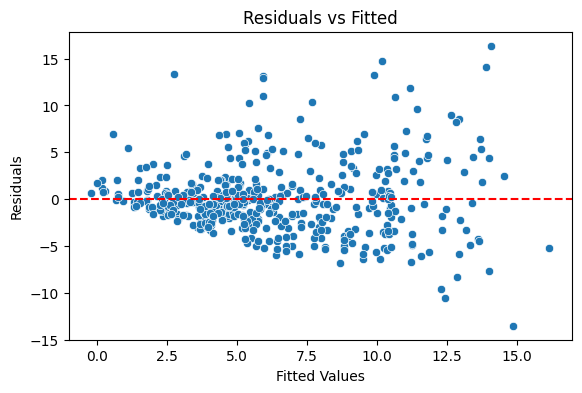

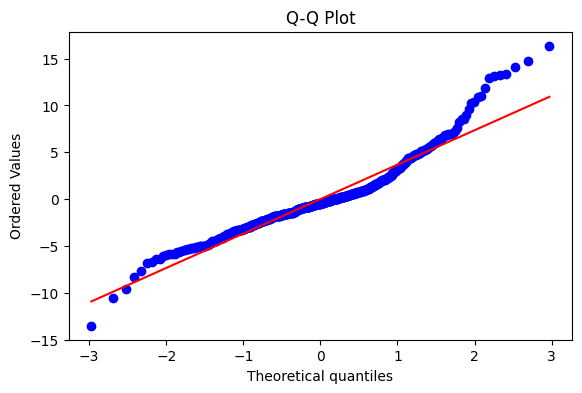

In [ ]:
# Residuals vs Fitted
plt.figure(figsize=(6.5, 4))
sns.scatterplot(x=mlr_01.fittedvalues, y=mlr_01.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q Plot
plt.figure(figsize=(6.5, 4))
stats.probplot(mlr_01.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

## Fit an MLR Model with Continuous and Categorical Predictors

Now, we update the MLR model by adding categorical variables: NLCD (National Land Cover Database) and FRG (Forest Regimes).

In [ ]:
# Create a DataFrame with selected variables
df_02 = mf[['SOC', 'DEM', 'Slope', 'MAT', 'MAP', 'NDVI', 'NLCD', 'FRG']]

# Drop rows with missing values (or impute as needed)
df_02 = df_02.dropna()

# Ensure categorical columns are strings
df_02['NLCD'] = df_02['NLCD'].astype(str)
df_02['FRG'] = df_02['FRG'].astype(str)

# Convert categorical variables to dummy variables
df_02 = pd.get_dummies(df_02, columns=['NLCD', 'FRG'], drop_first=True)

# Ensure all columns in X are numeric
X = df_02.drop('SOC', axis=1)
X = X.astype(float)  # Convert to float
X = sm.add_constant(X)  # Add intercept
y = df_02['SOC'].astype(float)  # Ensure y is numeric

# Check data types
print("Data types in X:\n", X.dtypes)

# Fit the MLR model
mlr_02 = sm.OLS(y, X).fit()

# Display summary
print(mlr_02.summary())

Data types in X:
 const                        float64
DEM                          float64
Slope                        float64
MAT                          float64
MAP                          float64
NDVI                         float64
NLCD_Herbaceous              float64
NLCD_Planted/Cultivated      float64
NLCD_Shrubland               float64
FRG_Fire Regime Group II     float64
FRG_Fire Regime Group III    float64
FRG_Fire Regime Group IV     float64
FRG_Fire Regime Group V      float64
FRG_Indeterminate FRG        float64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                    SOC   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     28.67
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           3.86e-51
Time:                        15:05:29   Log-Likelihood:

## Model Performance

In [ ]:
# Model performance
print(f"R-squared: {mlr_02.rsquared:.4f}")
print(f"Adjusted R-squared: {mlr_02.rsquared_adj:.4f}")

R-squared: 0.4514
Adjusted R-squared: 0.4356


## Model Comparison

To compare the performance of `mlr_01` and `mlr_02`, we can compare their R-squared and adjusted R-squared values:

In [ ]:
# Model comparison
comparison_df = pd.DataFrame({
    'Model': ['mlr_01', 'mlr_02'],
    'R-squared': [mlr_01.rsquared, mlr_02.rsquared],
    'Adjusted R-squared': [mlr_01.rsquared_adj, mlr_02.rsquared_adj]
}).round(4)
print(comparison_df)

    Model  R-squared  Adjusted R-squared
0  mlr_01     0.4354              0.4293
1  mlr_02     0.4514              0.4356


## Visualizing Model Predictions

To visualize the effect of a predictor (e.g., NDVI) on the dependent variable:

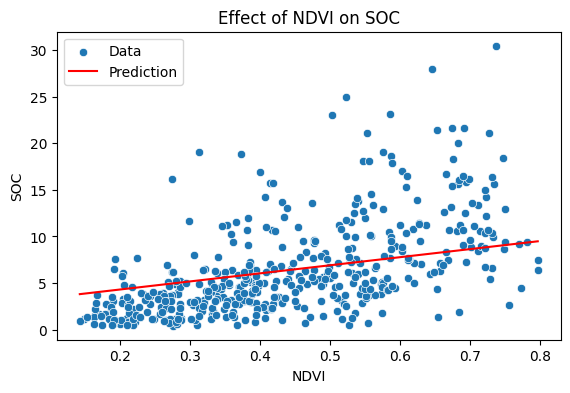

In [ ]:
# Effect of a continuous variable (NDVI)
plt.figure(figsize=(6.5, 4))
sns.scatterplot(x=df['NDVI'], y=df['SOC'], label='Data')
x_range = np.linspace(df['NDVI'].min(), df['NDVI'].max(), 100)
X_pred = pd.DataFrame({
    'const': 1,
    'DEM': df['DEM'].mean(),
    'Slope': df['Slope'].mean(),
    'MAT': df['MAT'].mean(),
    'MAP': df['MAP'].mean(),
    'NDVI': x_range
})
y_pred = mlr_01.predict(X_pred)
plt.plot(x_range, y_pred, color='red', label='Prediction')
plt.xlabel('NDVI')
plt.ylabel('SOC')
plt.title('Effect of NDVI on SOC')
plt.legend()
plt.show()

## Variance Inflation Factors (VIF)

VIF measures multicollinearity among predictors. A VIF greater than 5 or 10 indicates potential multicollinearity issues.

In [ ]:
# Calculate VIF
X = df[['DEM', 'Slope', 'MAT', 'MAP', 'NDVI']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable        VIF
0      DEM   6.898868
1    Slope   5.185288
2      MAT   4.869143
3      MAP  24.563212
4     NDVI  26.063162


## Relative Importance

To calculate the relative importance of predictors, we can use the `shap` library or compute standardized coefficients:

In [ ]:
# Standardized coefficients
X_std = (X - X.mean()) / X.std()
X_std = sm.add_constant(X_std)
mlr_std = sm.OLS((y - y.mean()) / y.std(), X_std).fit()
print("Standardized Coefficients:")
print(mlr_std.params[1:].round(4))  # Exclude intercept

Standardized Coefficients:
DEM     -0.0588
Slope    0.1548
MAT     -0.2634
MAP      0.2505
NDVI     0.2781
dtype: float64


## Summary and Conclusion

This tutorial provided a comprehensive overview of Multiple Linear Regression using Python, a powerful tool for modeling relationships between multiple variables. We covered data preparation, model building, and evaluation using `statsmodels`. By fitting MLR models, we interpreted coefficients to understand predictor impacts on the response variable. Diagnostic plots and statistical tests validated model assumptions.

MLR is crucial in fields like finance, economics, and social sciences, enabling informed predictions and insights into complex variable interactions. To further enhance your models, explore advanced topics like feature engineering, interaction terms, and regularization. This tutorial serves as a foundation for applying MLR to your datasets, uncovering patterns and relationships that drive meaningful insights.

## Resources

1. [Statsmodels Documentation](https://www.statsmodels.org/stable/index.html)
2. [Scikit-learn Documentation](https://scikit-learn.org/stable/)
3. [Pandas Documentation](https://pandas.pydata.org/)
4. [Seaborn Documentation](https://seaborn.pydata.org/)